In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python3.10


# Entscheidungsbäume

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import dtreeviz

In Kapitel 8 hatten wir die lineare Regression und die polynomiale Regression, als Verfahren zur Vorhersage kontinuierlicher Variablen kennen gelernt. Für die Vorhersage kategorialer Variablen wurde in Kapitel 9 die logistische Regression dargestellt. Im Folgenden werden wir ein Verfahren kennenlernen, das sowohl für Regressions- als auch Klassifikationsprobleme verwenden werden kann, die Entscheidungsbäume.

<a href="https://de.wikipedia.org/wiki/Entscheidungsbaum">Entscheidungsbäume</a> sind baumbasierte Verfahren, die sowohl für Regressions, als auch Klassifikationsprobleme genutzt werden können. Hierbei wir der Vorhersageraum in eine bestimmte Anzahl Regionen **segmentiert** und kann somit als Baumstruktur visualisiert werden ({cite:t}`James2013` s.303–314).

## Regressions-Bäume

Um Entscheidungsbäume besser zu verstehen, wenden wir uns zunächst dem Fall der Regression zu und behandeln **Regressions-Bäume**. Als Beispiel verwenden wir einen fiktiven Datensatz indem Einkommensdaten gelistet sind. Wir werden versuchen das Einkommen (`income`) anhand der Variablen Anzahl Jahre in der Schule (`education`) und Berufserfahrung (`seniority`) vorherzusagen. Zunächst laden wir den Datensatz:

In [2]:
df = pd.read_csv("../../data/income_data.csv")

Eine kurze Visualisierung der Daten zeigt, dass es einen Zusammenhang zwischen `income` und den beiden Prädiktoren `education` und `seniority` besteht, wobei der Zusammenhang für `education` etwas stärker ist als für `seniority`:

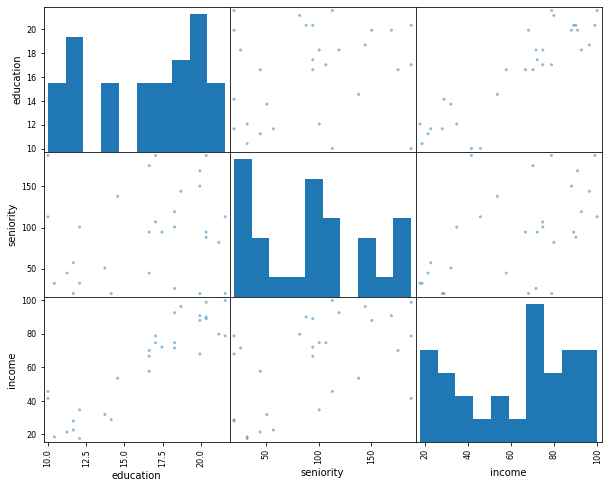

In [3]:
pd.plotting.scatter_matrix(df, figsize=(10, 8))
plt.show()

Wir greifen nun etwas voraus und fitten einen einfachen Entscheidungsbaum, unter Nutzung der Bibliothel `scikit-learn`, an die Daten und visualisieren den Baum anhand der Splits (hierfür verwenden wir die Bibliothek `dtreeviz`), die für die Variablen `education` und `seniority` im Entscheidungsbaum angewendet wurden. Hier zunächst die Visualisierung:

/home/imarevic/anaconda3/envs/srh/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


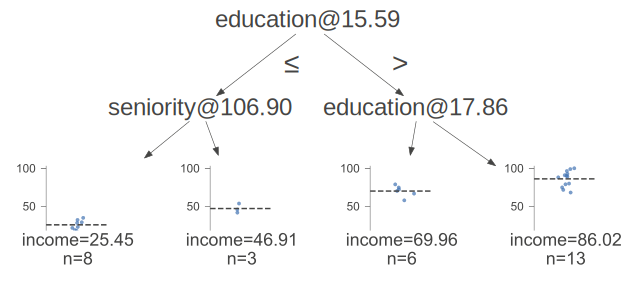

In [4]:
# fit a regression tree in order to create
# the regressor object
features = ["education", "seniority"]
target = "income"
X = df[features]
y = df[target]
reg = DecisionTreeRegressor(max_leaf_nodes=4, max_depth=2)
model = reg.fit(X, y)
# create viz model object
viz_model = dtreeviz.model(
    reg,
    X_train=df[features],
    y_train=df[target],
    feature_names=features,
    target_name=target,
)
# plot view
viz_model.view(fancy=False, scale=2)

In der erzeugten Visualisierung ist schön zu sehen, dass der Entscheidungsbaum zur Vorhersage des Einkommens bei einer Tiefe von 2 den ersten Split bei 15.59 Jahren in Bezug auf die Anzahl Jahre in der Schule einführt. Ein Eben darunter wird dann auf Basis der selben Variablen bei 17.86 Jahren, sowie bei einer Seniority von 106.90 gesplittet. Der in jedem "Blatt" des Baumes angezeigte Wert gibt das mittlere Einkommen für die Beobachtungen an, die zu dem jeweiligen Blatt gehören.

Verallgemeinert lässt sich also festhalten, dass in eneim Entscheidungsbaum die Ergebnisse eines Splits für Prädiktoren $X_{j}$ mit $j = {1, 2, 3, ..., n}$ wie folgt definiert sind:

$$
Linker Zweig: X_{j} < t_{k}
$$

$$
Rechter Zweig: X_{j} > t_{k}
$$

wobei $t_{k}$ den genauen Splitwert bezeichnet.

Würden wir die Daten, bei einer Baumtiefe von 2, in einem Streudiagramm visualisieren, dann liesen sich für jeden der Blätter im Baum eine **Region** einzeichnen. Diese werden anhand der **Splitwerte** bestimmt:

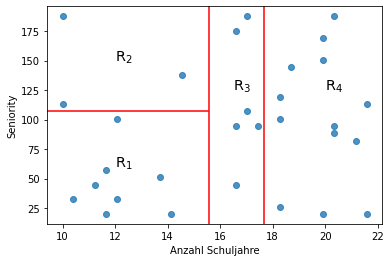

In [5]:
# plot regions in predictor space
params = {"mathtext.default": "regular"}
plt.rcParams.update(params)
plt.scatter(df["education"], df["seniority"], alpha=0.8)
plt.axvline(x=15.59, color="r", linestyle="-")
plt.axhline(y=106.9, xmax=0.481, color="r", linestyle="-")
plt.axvline(x=17.68, color="r", linestyle="-")
plt.text(x=12, y=60, s="$R_{1}$", fontsize="x-large")
plt.text(x=12, y=150, s="$R_{2}$", fontsize="x-large")
plt.text(x=16.5, y=125, s="$R_{3}$", fontsize="x-large")
plt.text(x=20, y=125, s="$R_{4}$", fontsize="x-large")
plt.xlabel("Anzahl Schuljahre")
plt.ylabel("Seniority")
plt.show()

Für jede der vier Regionen können wir den Mittelwert des Einkommens berechnen. Diese sind, wie oben beschrieben, in den Blättern des Baumes angeführt.
Die vier Regionen (auch **Endknoten** oder **Blätter** genannt)  $R_{1}$ - $R_{4}$ unterteilen den Prädiktorenraum nach folgenden Eigenschaften:

- $R_{1} = \{X | education < 15.59, seniority < 106.90\}$ &rarr; Personen mit weniger als 15.59 Schuljahren und einer Seniority von höchstens 106.9
- $R_{2} = \{X | education < 15.59, seniority > 106.90\}$ &rarr; Personen mit weniger als 15.59 Schuljahren und einer Seniority von mindestens 106.9
- $R_{3} = \{X | 15.59 < education < 17.86 \}$ &rarr; Personen zwischen 15.59 und 17.86 Schuljahren
- $R_{4} = \{X | education > 17.86 \}$ &rarr; Personen mit mehr als 17.86 Schuljahren

Anhand der Regionen und der Baumstruktur lassen sich Entscheidungsbäume sehr gut in Worten beschrieben und können somit bei komplexen Datensätzen leichter als klassische Regressionsmdelle interpretiert werden.

Die Hauptelemente eines Entscheidungsbaums lasssen sich also wie folgt zusammenfassen:
    
| Baumelement  | Definition  |
|---|---|
|  Blatt/Endknoten | Unterste Ebene des Entscheidungsbaumes nachdem alle Splits vollzogen wurden.  |
|  Interne Knoten | Knoten, die zwischem dem Ursprung und den Blättern liegen. Entlang dieser Knoten wird gesplittet.  |
|  Zweige | Segmente des Baums, welche die Knoten verbinden.  |

Beim betrachten eines Entscheidungsbaumes wird schnell deutlich, dass theoretisch bliebig viele Regionen $R_{n}$ erzeugt werden könnten. Es stellt sich also die Frage wie eine Entscheidungsbaum effizient und möglichst aussagekräftig auf gegebenen Daten erzeugt werden kann. Hierzu sind im Allgemeinen folgende 2 Schritte durchzuführen:

1. Wir teilen den Prädiktorenraum, also die Menge aller möglichen Werte für $X_{1}, X_{2}, ..., X_{j}$ in $J$ distinkte und sich nicht überlappende Regionen $R_{1}, R_{2}, , ..., R_{J}$
2. Für jede Beobachtung, die in die Region $R_{j}$ fällt, machen wir dieselbe Vorhersage anhand des Mittelwerts der Trainingsdaten der entsprechenden Region.

Wie wählen wir aber die Regionen $R_{1}, ..., R_{J}$? 

Hierbei ist die Unterteilung in die obigen vier Regionen eine starke Verienfachung. In der Praxis werden die Regionen so gewählt, dass die **Summe der Fehlerquadrate (SSE)** minimiert wird.

$$SSE = \sum_{j=1}^J\sum_{i \in \mathbb{R}} (y_{i} - \hat y_{R_{j}})^2$$

wobei $\hat y_{R_{j}}$ den Mittelwert der Trainingsbeobachtungen in ther j-ten Region angibt.

Es wird schnell deutlich, dass es in der Praxis keinen Sinn macht jede mögliche Partitionierung in Regionen durchzuführen um am Ende die Beste Konfiguration zu wählen. Daher wird der Entscheidungsbaum in der Praxis einem *top-down greedy* Verfahren aufgebaut. Diese Verfahren wird auch als **rekursives binäres Splitting** bezeichnet. Hierbei beginnt man oben am Baum und splitted immer in suzzesive 2 Regionen, wobei der Splitpunkt *s* immer so gewählt wird, dass der Split zur größt mögliche Reduktion im SSE führt. Das Verfahren ist **greedy**, da bei jedem Split des Baumaufbaus immer nur der beste Split zu diesem bestimmten Zeitpunkt definiert wird. Es wird also nicht berücksichtigt ob der Split zum Zeitpunkt $t_{1}$ ein guter Split für den finalen Baum war, der zu einem späteren Zeitpunkt $t_{5}$ entstehen könnte. Dieses Verfahren wird so lange wiederholt, bis ein Stopkriterium erfüllt ist (z.B. weniger als 5 Datenpunkte in einer Region).

Der **Top-Down Greedy Entscheidungsbaum Algorithmus** lässt sich also wie folgt formalisieren:

1. Starte mit dem gesmaten Prädiktorraum und splitte diesen in 2 Regionen unter Selektion des Prädiktors $X_{j}$ und dem Splitpunkt $s$, so dass der Raum in die beiden Regionen $\{X|X_{j} < s\}$ und $\{X|X_{j} \geq s\}$ unterteilt wird und zur größt möglichen Reduktion im SSE führt. Die Notation $\{X|X_{j} < s\}$ bedeutet in diesem Kontext die Region des Prädiktorraums in dem $X_{j}$ einen Wert kleiner $s$ annimmt. Das bedeuet, wir berücksichtigen alle Prädiktoren $X_{1}, ..., X_{p}$ und alle möglichen Werte für den Splitpunt $s$ für jeden der Prädiktoren. Formal können wir notieren:

    Für jedes $j$ und $s$ definieren wir das Paar ein Halbebenen

    $$R_{1}(j, s) = \{X|X_{j} < s\}$$ 
    
    und 
    
    $$R_{2}(j, s) = \{X|X_{j} \geq s\}$$
    
    und wir suchen Werte für $j$ und $s$, welche folgende Gleichung minimieren:
    
    $$\sum_{i: x_{i} \in R_{1}(j,s)} (y_{i} - \hat y_{R_{1}})^2 + \sum_{i: x_{i} \in R_{2}(j,s)} (y_{i} - \hat y_{R_{2}})^2$$


2. Wiederhole dieses Vorgehen für den nächsten Split, wobei der SSE nur für diesen Split zum Zeitpunkt $t_{j}$ minimiert wird.

3. Der Prozess endet sobald ein Stoppkriterium $K$ erreicht ist, wobei $K$ die Anzahl Datenpunkte in einer Region ist, erreicht ist. Zum Beispiel $K=5$.

4. Sobald die Regionen $R_{1}, ..., R_{J}$ erstellt wurden, wird der Mittelwert zu jeder Beobachtung des Testdate<nsatzes, die in diese Region fällt, ausgegeben.



## Tree Pruning

## Klassifikations-Bäume

## Entscheidungsbäume - Ein Beispiel in Python

Im Folgenden werden wir einen einfachen Entscheidungsbaum in Python implementieren. Hierbie versuchen wir den oben beschriebenen Algorithmus in Python Code zu überführen (wir beschränken uns also auf einen einfachen Regressionsbaum). Die implementierung können wir dann mit der Standardimplementiereung der Pythonbibliothek `scikit-learn` vergleichen.

In [45]:
# define regression tree
def decision_tree_regression(X, y, max_leaf_nodes, max_depth):
    pass

Nun wollen wir das Ergbnis mit `scikit-learn` vergleichen:

## Entscheidungsbäume vs. Lineare Modelle

Regressions- und Klassifikationsbäume sind eine fundamental andere Herangehensweise an ein Machine Learning Problem im Vergleich zu klassischen Verfahren wie die lineare Regression. Wenn wir uns das lineare Regressiosnmodell ansehen, dann kann es wie folgt formalisiert werden:

$$
f(X) = \beta_{0} + \sum_{j=1}^p X_{j}\beta_{j}
$$

Im Gegensatz dazu hat ein Entscheidungsbaum folgende Form:

$$
f(X) = \sum_{m=1}^M c_{m} \cdot 1_{X \in R_{m}}
$$

wobei $R_{1}, ..., R_{M}$ eine Partition des Prädiktorraumes repräsentiert. 

Wenn man sich nun fragt welches der beiden Modelle besser ist, bleibt einem nur zusagen, dass es auf das Problem ankommt. Wenn der Zusammenhang zwischen den Prädiktoren und der Antwortvariablen gut durch ein lineares Modell aproximiert werden kann, dann wird ein lineares Modell besser als ein Entscheidungsbaum funktionieren. Wenn aber ein non-linearer oder komplexer Zusammenhang zwischen den Prädiktoren und der Antwortvariablen besteht, dann ist ein Entscheidungsbaum besser geeignet. Ein illustratives Beispiel hierzu kann mit folgender Visualisierung gegeben werden:

Text(0, 0.5, 'X 2')

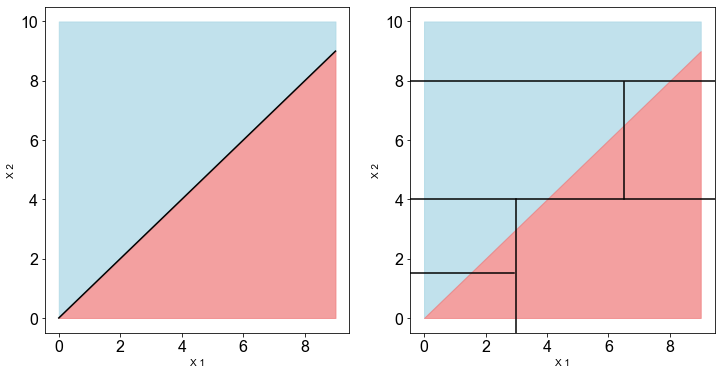

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2)
x = range(10)
# left plot
ax[0].plot(x, color="k")
ax[0].fill_between(x=x, y1=10, y2=x, color="lightblue", interpolate=True, alpha=0.75)
ax[0].fill_between(x=x, y1=x, y2=0, color="lightcoral", interpolate=True, alpha=0.75)
ax[0].set_xlabel("X 1")
ax[0].set_ylabel("X 2")
# right plot
ax[1].axhline(y=1.5, xmax=0.34, color="k", linestyle="-")
ax[1].axvline(x=3, ymax=0.41, color="k", linestyle="-")
ax[1].axhline(y=4, color="k", linestyle="-")
ax[1].axvline(x=6.5, ymin=0.41, ymax=0.77, color="k", linestyle="-")
ax[1].axhline(y=8, color="k", linestyle="-")
ax[1].fill_between(x=x, y1=10, y2=x, color="lightblue", interpolate=True, alpha=0.75)
ax[1].fill_between(x=x, y1=x, y2=0, color="lightcoral", interpolate=True, alpha=0.75)
ax[1].set_xlabel("X 1")
ax[1].set_ylabel("X 2")

Hier ist auf der linken Seite ein ...... Auf der rechten Seite

Das selbe gilt natürlich auch für ..
Hier ist auf der linken Seite ein ...... Auf der rechten Seite

Text(0, 0.5, 'X 2')

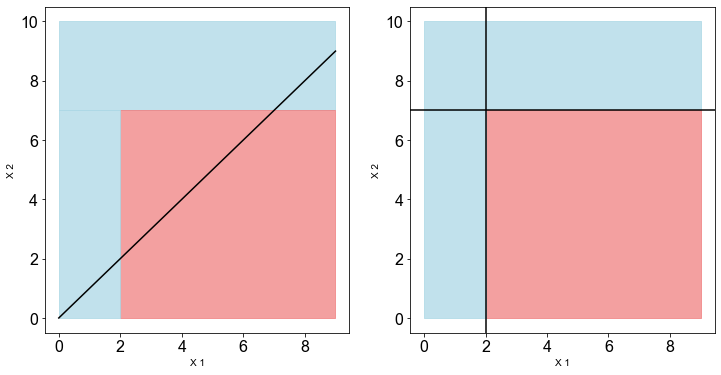

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=2)
x = range(10)
# left plot
ax[0].plot(x, color="k")
ax[0].fill_between(x=x, y1=10, y2=7, color="lightblue", interpolate=True, alpha=0.75)
ax[0].fill_between(
    x=range(2, 10), y1=7, y2=0, color="lightcoral", interpolate=True, alpha=0.75
)
ax[0].fill_betweenx(
    y=range(8), x1=2, x2=0, color="lightblue", interpolate=True, alpha=0.75
)
ax[0].set_xlabel("X 1")
ax[0].set_ylabel("X 2")
# right plot
ax[1].fill_between(x=x, y1=10, y2=7, color="lightblue", interpolate=True, alpha=0.75)
ax[1].fill_between(
    x=range(2, 10), y1=7, y2=0, color="lightcoral", interpolate=True, alpha=0.75
)
ax[1].fill_betweenx(
    y=range(8), x1=2, x2=0, color="lightblue", interpolate=True, alpha=0.75
)
ax[1].axvline(x=2, color="k", linestyle="-")
ax[1].axhline(y=7, color="k", linestyle="-")
ax[1].set_xlabel("X 1")
ax[1].set_ylabel("X 2")

## Vor- und Nachteile von Entscheidungsbäumen

Entscheidungsbäume für Regressions- und Klassifikationsprobleme haben einige Vor- und Nachteile gegenüber den Verfahren der vorherigen Kapitel. Diese wollen wir hier auflisten:

**Vorteile:**

- Entscheidungsbäume lassen sich sehr leicht erklären und sind intuitiver als andere Verfahren.
- Manche Menschen sind überzeugt, dass Entscheidungsbäume näher an menschlicher Entscheidungsfindung sind als andere Verfahren.
- Eintscheidungsbäume können grafisch dargestellt werden und sind leicht zu interpretieren. Dies ermöglicht auch Nicht-Experten einen Zugang zu den damit untersuchten Problemen.
- Entscheidungbäume können qualitative Prädiktoren vararbeiten ohne Dummy Variablen einführen zu müssen.

**Nachteile:**

- In manchen Fällen können Entscheidungsbäume nicht die selbe Vorhersagegenauigkeit aufweisen wie andere Verfahren, innsbesondere bei linearen Zusammenhängen.
- Entscheidungsbäume können fragil sein gegenüber kleinen Änderungen in den Daten. Das bedeutet das kleine Änderungen an den Daten relativ große Abweichungen in der Vorhersage produzieren können.

Die soeben angeführten Nachteile lassen sich jedoch durch Erweiterungen der Entscheidungbäume (z.B. Bagging, Boosting) kompensieren, was uns zu *Random Forests* führt. Diesen werden wir uns im nächsten Kapitel widmen.